# Utilization



## Modules

In [ ]:
!pip install ultralytics==8.1.26 >> "general_log_modules.txt"
!pip install diffusers==0.26.3 transformers==4.38.2 accelerate==0.27.2 >> "general_log_modules.txt"

## Packages

In [ ]:
import warnings
warningList = [DeprecationWarning,FutureWarning,UserWarning,RuntimeWarning]
for warn in warningList: warnings.filterwarnings("ignore",category=warn)

In [ ]:
%%capture
import os,shutil,time,uuid,requests,torch
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from google.colab import userdata
from typing import Optional,Any,Type,Union
from PIL import Image as PILImage
from transformers import AutoProcessor,SamModel,VitMatteForImageMatting
from requests.packages.urllib3.exceptions import InsecureRequestWarning,InsecurePlatformWarning

In [ ]:
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
requests.packages.urllib3.disable_warnings(InsecurePlatformWarning)

## Class

In [ ]:
class ClassInitial(object): pass
class ErrorInitial(Exception): pass
class ModelInitial(object): pass
class NullInitial(object): pass
class FunctionInitial(object): pass
class ProcessInitial(object): pass

In [ ]:
class File:
  def __init__(self,path:str,name:str=None)->Optional[ClassInitial]:
    self.path = path
    if name:
      self.name = name
    else:
      self.name = str(uuid.uuid4()).replace("-","_")
    self.source = self.GetSource(self.path)
  def FileResponse(self,response:Union[str,ClassInitial])->ProcessInitial:
    self.response = response
  def GetSource(self,path:str,prefix:str="_")->str:
    parts = path.split(prefix)
    return parts[0]

In [ ]:
class Constants:
  imageDirectory = os.path.join(os.getcwd(),"image_directory")
  maskDirectory = os.path.join(os.getcwd(),"mask_outputs")
  responseFile = os.path.join(os.getcwd(),"response","last_response.txt")
  transformerCacheDirectory = os.path.join(os.getcwd(),"model_cache")
  diffusionResultDirectory = os.path.join(os.getcwd(),"diffusion_output")
  vitResultDirectory = os.path.join(os.getcwd(),"vit_outputs")

In [ ]:
class ErrorModule(ErrorInitial):
  def __init__(self,error:ErrorInitial=NotImplementedError)->Optional[ClassInitial]:
    self.error = error
  def __str__(self)->str:
    return "ERROR MODULATION"
  def __len__(self)->int:
    return 0
  def __getstate__(self,message:ErrorInitial=NotImplemented)->ErrorInitial:
    return self.error(message)
  def __call__(self,message:ErrorInitial=NotImplemented)->ErrorInitial:
    raise self.error(message)
  def __repr__(self)->str:
    return ErrorModule.__doc__
  def Manuel(self,error:ErrorInitial,message:Union[str,ErrorInitial])->ErrorInitial:
    raise error(message)

In [ ]:
errors = ErrorModule()

In [ ]:
class WriteOutput(FunctionInitial):
  def __init__(self,path:Union[str,None]=None)->Optional[ClassInitial]:
    CreateDirectory(os.path.join(os.getcwd(),"response"))
    self.ops = None
    if path is not None:
      self.__path = path
    else:
      self.__path = Constants.responseFile
  def __str__(self)->str:
    return "WRITING MODULATION"
  def __call__(self)->NullInitial:
    return None
  def __len__(self)->int:
    return 0
  def __getstate__(self)->ErrorInitial:
    errors()
  def __repr__(self)->str:
    return WriteOutput.__doc__
  def Text(self,text:Union[str,bytes])->ProcessInitial:
    if isinstance(text,bytes): text = text.decode("utf-8")
    return self.ops.write(str(text))
  def __enter__(self)->ProcessInitial:
    self.ops = open(self.__path,"w",encoding="utf-8")
    return self
  def __exit__(self,et:ClassInitial,eb:ClassInitial,ex:ClassInitial)->ProcessInitial:
    self.ops.close()

In [ ]:
class Credentials(FunctionInitial):
  def __init__(self)->Optional[ClassInitial]:
    self.__google = userdata.get("GOOGLE_API_KEY")
    self.__gemini = userdata.get("GEMINI_NEW_API")
    self.__hugging = userdata.get("HUGGINGFACEHUB_API_TOKEN")
    self.__openai = userdata.get("OPENAI_NEW_API")
    self.__cse = userdata.get("CSE_ID_KEY")
  def __str__(self)->str:
    return "CREDENTIALS MODULATION"
  def __call__(self)->ProcessInitial:
    os.environ["OPENAI_API_KEY"] = self.__openai
    os.environ["GEMINI_API_KEY"] = self.__gemini
    os.environ["HUGGINGFACEHUB_API_TOKEN"] = self.__hugging
    os.environ["GOOGLE_CSE_ID"] = self.__cse
    os.environ["GOOGLE_API_KEY"] = self.__google
    self.HuggingLogin()
    print("[:: FROM SYSTEM ::] CREDENTIALS HAS BEEN DEFINED")
  def __getstate__(self)->ErrorInitial:
    errors()
  def __repr__(self)->str:
    return Credentials.__doc__
  def __len__(self)->int:
    return 0
  def HuggingLogin(self)->ProcessInitial:
    if "HUGGINGFACEHUB_API_TOKEN" in os.environ:
      globals()["HUGGING_LOGIN_KEY"] = self.__hugging
      !huggingface-cli login --token $HUGGING_LOGIN_KEY
    else:
      os.environ["HUGGINGFACEHUB_API_TOKEN"] = self.__hugging
      globals()["HUGGING_LOGIN_KEY"] = self.__hugging
      !huggingface-cli login --token $HUGGING_LOGIN_KEY

In [ ]:
credentials = Credentials()
credentials()

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful
[:: FROM SYSTEM ::] CREDENTIALS HAS BEEN DEFINED


## Functions

In [ ]:
CreateDirectory:Optional[FunctionInitial] = lambda path:os.mkdir(path) if not os.path.exists(path) else None
DeleteDirectory:Optional[FunctionInitial] = lambda path:shutil.rmtree(path) if len(os.listdir(path)) > 0 else None
SortDirectory:Optional[FunctionInitial] = lambda path:int(path.rsplit("_",1)[-1].split(".")[0])
ReadRawImage:Optional[FunctionInitial] = lambda x:cv.cvtColor(cv.imread(x),cv.COLOR_BGR2RGB) if isinstance(x,str) else cv.cvtColor(x,cv.COLOR_BGR2RGB)
SavePILImage:Optional[FunctionInitial] = lambda path,image:cv.imwrite(str(path),np.array(image.convert("RGB"),dtype=np.uint8)) if type(image) is not np.ndarray else cv.imwrite(str(path),np.array(image,dtype=np.uint8))
KeyControl:Optional[FunctionInitial] = lambda key:key.name.lower().replace(" ","_") if " " in key.name else key.name
DeleteHTTP:Optional[FunctionInitial] = lambda site:site.replace("http://","").replace("https://","").rstrip().lstrip()
GlobalChecker:Optional[FunctionInitial] = lambda variable:str(variable) in globals()

In [ ]:
def PrintDecoder(func:ClassInitial)->Union[str,None]:
  def Wrapper(*args,**kwargs)->Union[str,None]:
    result = func(*args,**kwargs)
    name = str(func.__name__)
    print(f"[::FROM SYSTEM OPERATION FOR {name} ::] {str(result).upper()}")
    return result
  return Wrapper

In [ ]:
def TimerDecoder(func:ClassInitial)->Union[str,None]:
  def Wrapper(*args,**kwargs)->Union[str,None]:
    before = time.time()
    result = func(*args,**kwargs)
    after = time.time()
    difference = after-before
    name = str(func.__name__)
    print(f"[::FROM SYSTEM OPERATION FOR {name} ::] EXECUTED IN {difference:.3f} SECONDS")
    return result
  return Wrapper

In [ ]:
def IsTerminated(message:Union[dict,ClassInitial])->bool:
  if isinstance(message,dict):
    message = message.get("content",None)
    if message is None:
      return False
    else:
      return message.rstrip().endswith("TERMINATE")

In [ ]:
def StrToList(message:str)->list:
  if message is not None:
    output = message.strip("][").replace("'","")
    output = output.strip("][").replace('"','').replace("]","").replace("[","").split(", ")
    return output
  else:
    return []

In [ ]:
def ShapeTransferControl(image1:Optional[ClassInitial],image2:Optional[ClassInitial])->tuple:
  if sum(image1.size) != sum(image2.size):
    if sum(image1.size) > sum(image2.size):
      image2 = image2.resize((image1.size[0],image1.size[1]))
    else:
      image1 = image1.resize((image2.size[0],image2.size[1]))
  else:
    pass
  return image1,image2

In [ ]:
def SaveURLImage(images:Union[str,list])->ProcessInitial:
  CreateDirectory(Constants.imageDirectory)
  if isinstance(images,str): images = [images]
  for _c,image in enumerate(images):
    try:
      if ("https://" in image) or ("http://" in image):
        get = requests.get(image,verify=False,stream=True,allow_redirects=True,timeout=300)
        if 400 > get.status_code >= 200:
          raw = PILImage.open(get.raw)
          path = os.path.join(Constants.imageDirectory,f"saved_image_{_c}.jpg")
          SavePILImage(path,raw)
          print(f"[::FROM SYSTEM ::] IMAGE HAS BEEN SAVED TO {path}")
        else:
          print(f"[::FROM SYSTEM ::] SITE CONNECTION REFUSED FOR IMAGE SAVING")
      else:
        path = os.path.join(Constants.imageDirectory,f"saved_image_{_c}.jpg")
        image = ReadRawImage(image)
        image = np.array(image,dtype=np.uint8)
        cv.imwrite(path,image)
        print(f"[::FROM SYSTEM ::] IMAGE HAS BEEN SAVED TO {path}")
    except:
      pass

In [ ]:
class DisplayImage(object):
  def __init__(self)->Optional[ClassInitial]:
    self.__figsize = (8,8)
    self.title = "Sample Output"
    self.titleOptional = "Response Output"
    self.titleDiffusion = "Diffusion Output"
  def __str__(self)->str:
    return "DISPLAY MODULATION"
  def __call__(self)->NullInitial:
    return None
  def __getstate__(self)->ErrorInitial:
    errors()
  def __repr__(self)->str:
    return DisplayImage.__doc__
  def __len__(self)->int:
    return 0
  def Sample(self,image:np.ndarray)->ProcessInitial:
    plt.figure(figsize=self.__figsize)
    plt.title(self.title)
    plt.axis("off")
    if type(image) == np.ndarray:
      plt.imshow(image)
    else:
      image = ReadRawImage(image)
      plt.imshow(image)
    plt.tight_layout()
    plt.show()
  def Multi(self,image1:np.ndarray,image2:np.ndarray,isSaved:bool=True,count:int=0)->ProcessInitial:
    try:
      if type(image1) is not np.ndarray:
        image = ReadRawImage(image1)
    except:
      pass
    try:
      if type(image2) is not np.ndarray:
        image = ReadRawImage(image2)
    except:
      pass
    figure,axis = plt.subplots(1,2,figsize=self.__figsize)
    axis[0].set_title(self.title)
    axis[1].set_title(self.titleOptional)
    axis[0].axis("off")
    axis[1].axis("off")
    axis[0].imshow(image1)
    axis[1].imshow(image2)
    if isSaved:
      CreateDirectory(Constants.imageDirectory)
      path = os.path.join(Constants.imageDirectory,f"multi_displayed_image_{count}.jpg")
      figure.savefig(path)
      print(f"[::FROM SYSTEM ::] IMAGE HAS BEEN SAVED TO {path}")
    plt.tight_layout()
    plt.show()
  def Diffusion(self,image:ClassInitial)->ProcessInitial:
    image = image[0][0].convert("RGB")
    plt.figure(figsize=self.__figsize)
    plt.title(self.titleDiffusion)
    plt.axis("off")
    plt.imshow(image)
    plt.tight_layout()
    plt.show()

In [ ]:
displayEngine = DisplayImage()

# Region Of Interest Extraction

## Modulation

In [ ]:
class ROIModule(object):
  def __init__(self,targetClass:list=[0])->Optional[ClassInitial]:
    from ultralytics import YOLO
    self.__device = str(torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
    self.confidence = 0.3
    self.inference = 0.7
    self.classes = targetClass
    self.save = False
    self.saveTXT = False
    self.saveCrop = False
    self.modelName = "yolov8s.pt"
    self.model = YOLO(str(self.modelName))
  def __str__(self)->str:
    return "REGION OF INTEREST EXTRACTION MODULATION"
  def __call__(self)->NullInitial:
    return None
  def __getstate__(self)->ErrorInitial:
    errors()
  def __repr__(self)->str:
    return ROIModule.__doc__
  def __len__(self)->int:
    return 0
  def GetBounding(self,image:Union[ClassInitial,str])->ProcessInitial:
    image = ReadRawImage(image)
    result = self.model.predict(
        source=image,
        conf=self.confidence,
        iou=self.inference,
        save=self.save,
        save_txt=self.saveTXT,
        save_crop=self.saveCrop,
        classes=self.classes,
        device=self.__device,
        verbose=False,
        show=False,
        visualize=False
    )
    if result is not None and (len(result) > 0):
      bounding = []
      for idx in range(len(result)):
        data = result[idx]
        points = data.boxes.data
        bounding += [x[:4].tolist() for x in points] if len(points) > 0 else []
    else:
      print(f"[::FROM SYSTEM ::] NUMBER OF OBJECTS FOUND FROM THE TARGET {len(bounding)}")
      bounding = []
    return bounding

In [ ]:
roiEngine = ROIModule()

100%|██████████| 21.5M/21.5M [00:00<00:00, 51.2MB/s]


- TEST OPTION:

```
targetImage = "/content/wearehere.jpeg"
bb = roiEngine.GetBounding(targetImage)
```

# Segmentation Process

## Modulation

In [ ]:
class LoadTransformer(object):
  def __init__(self)->Optional[ClassInitial]:
    CreateDirectory(os.path.join(os.getcwd(),"model_cache"))
    self.model = "facebook/sam-vit-huge"
    self.__device = str(torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
  def __str__(self)->str:
    return "LOAD TRANSFORMERS MODULATION"
  def __call__(self)->NullInitial:
    return None
  def __getstate__(self)->ErrorInitial:
    errors()
  def __repr__(self)->str:
    return LoadTransformer.__doc__
  def __len__(self)->int:
    return 0
  def Get(self,segmentationType:str="SAM")->ModelInitial:
    if segmentationType.lower() == "sam":
      self.model = "facebook/sam-vit-huge"
      processor = AutoProcessor.from_pretrained(self.model,cache_dir=Constants.transformerCacheDirectory)
      model = SamModel.from_pretrained(self.model).to(self.__device)
      return processor,model
    else:
      processor = AutoProcessor.from_pretrained(self.model,cache_dir=Constants.transformerCacheDirectory)
      model = VitMatteForImageMatting.from_pretrained(self.model)
      return processor,model

In [ ]:
transformerEngine = LoadTransformer()

In [ ]:
class PredictionMask(object):
  def __init__(self)->Optional[ClassInitial]:
    self.color = np.array([30/255,144/255,255/255,0.6])
    self.__device = str(torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
    self.figsize = (8,8)
  def __str__(self)->str:
    return "Prediction Mask Output Modulation"
  def __call__(self)->NullInitial:
    return None
  def __getstate__(self)->ErrorInitial:
    ErrorModule().Default
  def __repr__(self)->str:
    return PredictionMask.__doc__
  def GetRandomColor(self)->np.ndarray:
    return np.concatenate(
        [
            np.random.randint(3),
            np.array([0.6])
        ],
        axis=0
    )
  def SigmoidMask(self,mask:Union[ProcessInitial,np.ndarray],color:np.ndarray)->Union[ProcessInitial,np.ndarray]:
    seg = torch.sigmoid(mask.squeeze(1))
    seg = seg.cpu().numpy().squeeze()
    seg = (seg > 0.5).astype(np.uint8)
    hgt,wdt = seg.shape[-2:]
    mask = seg.reshape(wdt,hgt,1)*color.reshape(1,1,-1)
    return mask
  def Display(self,image:np.ndarray,mask:Union[ProcessInitial,np.ndarray],isRandom:bool=False,save:bool=False,count:int=0)->ProcessInitial:
    if isRandom:
      color = self.GetRandomColor()
    else:
      color = self.color
    mask = self.SigmoidMask(mask=mask,color=color)
    image = cv.resize(image,(mask.shape[0],mask.shape[1]))
    figure,axs = plt.subplots(figsize=self.figsize)
    axs.axis("off")
    axs.title.set_text("Output-Image Mask")
    axs.imshow(image)
    axs.imshow(mask,alpha=0.6)
    if save:
      if not os.path.exists(os.path.join(os.getcwd(),"predictions")):
        CreateDirectory("predictions")
      path = os.path.join(os.getcwd(),"predictions",f"image_mask_output_{count}.jpg")
      figure.savefig(path)
      plt.tight_layout()
      plt.show()
  def Extraction(self,image:np.ndarray,isRandom:bool=False,save:bool=False,count:int=0,isResized:bool=True,modelName:str="SAM")->Union[tuple,ProcessInitial]:
    dataSegmentation,dataSigmoid = [],[]
    image = ReadRawImage(image)
    image = cv.resize(image,(1000,1000)) if isResized else image
    print(f"[::FROM SYSTEM ::] IMAGE SHAPE: {image.shape}")
    bounding = roiEngine.GetBounding(image)
    print("[::FROM SYSTEM ::] BOUNDING EXTRACTION - DONE")
    processor,model = transformerEngine.Get(str(modelName))
    segmentation = processor(
        image,
        input_boxes=[bounding],
        return_tensors="pt"
    ).to(self.__device)
    print(f"[::FROM SYSTEM ::] INPUT BOXES SHAPE: {segmentation['input_boxes'].shape}")
    model.to(self.__device)
    with torch.no_grad():
      output = model(**segmentation,multimask_output=False)
    target = output.pred_masks
    for idx in range(target.shape[1]):
      data = target[0][idx]
      sigmoid = self.SigmoidMask(mask=data,color=self.color)
      dataSigmoid.append(sigmoid)
      dataSegmentation.append(data)
      self.Display(image=image,mask=data,isRandom=isRandom,save=save,count=idx)
    return dataSegmentation,dataSigmoid

In [ ]:
maskEngine = PredictionMask()

- TEST OPTION:

```
data,sigmoids = maskEngine.Extraction("/content/wearehere.jpeg")
```

## Reversing Process

In [ ]:
class ReverseModule(object):
  def __init__(self)->Optional[ClassInitial]:
    pass
  def __str__(self)->str:
    return "REVERSE STRUCTURE MODULATION"
  def __call__(self)->NullInitial:
    return None
  def __getstate__(self)->ErrorInitial:
    errors()
  def __repr__(self)->str:
    return ReverseModule.__doc__
  def __len__(self)->int:
    return 0
  def Colors(self,masks:Union[list,np.ndarray],image:np.ndarray,isSaved:bool=True)->Union[tuple,ProcessInitial]:
    rgbMasks,grayMasks = [],[]
    displayEngine.title = "Sample"
    image = ReadRawImage(image)
    if isinstance(masks,list):
      pass
    else:
      masks = [masks]
    for idx in range(len(masks)):
      data = masks[idx].cpu().numpy()
      data = data.reshape(data.shape[-2],data.shape[-1],1)
      rgb = cv.cvtColor(data,cv.COLOR_GRAY2RGB)
      rgbMasks.append(rgb)
      gray = cv.cvtColor(rgb,cv.COLOR_BGR2GRAY)
      grayMasks.append(gray)
      print(f"[::FROM SYSTEM ::] RGB MASK SHAPE: {rgb.shape}")
      print(f"[::FROM SYSTEM ::] GRAY MASK SHAPE: {gray.shape}")
      displayEngine.titleOptional = "RGB Output"
      displayEngine.Multi(image,rgb,isSaved=isSaved,count=idx)
      displayEngine.titleOptional = "GRAY Output"
      displayEngine.Multi(image,gray,isSaved=isSaved,count=idx+1)
    return rgbMasks,grayMasks
  def GetReverseTargets(self,masks:Union[list,np.ndarray])->Union[tuple,ProcessInitial]:
    bitwiseNots,bitwiseAnds,bitwiseNotsPils,bitwiseAndsPils = [],[],[],[]
    displayEngine.title = "NOT Sample"
    displayEngine.titleOptional = "AND Sample"
    if isinstance(masks,list):
      pass
    else:
      masks = [masks]
    for idx in range(len(masks)):
      data = masks[idx]
      data = data.astype(np.uint8)
      pilTransfer = PILImage.fromarray(data)
      print(f"[::FROM SYSTEM ::] PIL TRANSFER MASK SHAPE: {pilTransfer.size}")
      bitwiseNotReverse = cv.bitwise_not(np.array(pilTransfer))
      bitwiseAndReverse = cv.bitwise_and(np.array(pilTransfer),np.array(pilTransfer))
      bitwiseNots.append(bitwiseNotReverse)
      bitwiseAnds.append(bitwiseAndReverse)
      displayEngine.Multi(bitwiseNotReverse,bitwiseAndReverse,isSaved=True,count=idx)
      notPil = PILImage.fromarray(bitwiseNotReverse)
      andPil = PILImage.fromarray(bitwiseAndReverse)
      bitwiseNotsPils.append(notPil)
      bitwiseAndsPils.append(andPil)
    return bitwiseNots,bitwiseAnds,bitwiseNotsPils,bitwiseAndsPils
  def GetCombined(self,masks:Optional[list])->Union[ProcessInitial,ClassInitial]:
    combined = reduce(lambda x, y: x | y, map(np.array, masks))
    combined = PILImage.fromarray(combined)
    return combined

In [ ]:
reverseEngine = ReverseModule()

- TEST OPTION:

```
data,sigmoids = maskEngine.Extraction("/content/wearehere.jpeg")
rgbList,grayList = reverseEngine.Colors(data,"/content/wearehere.jpeg")
bitwiseNots,bitwiseAnds,bitwiseNotsPils,bitwiseAndsPils = reverseEngine.GetReverseTargets(rgbList)

```

# VIT Transfer Process

## Modulation

In [ ]:
class VITTransfer(object):
  def __init__(self)->Optional[ClassInitial]:
    self.model = "hustvl/vitmatte-small-composition-1k"
  def __str__(self)->str:
    return "VIT TRANSFER MODULATION"
  def __call__(self)->NullInitial:
    return None
  def __getstate__(self)->ErrorInitial:
    errors()
  def __repr__(self)->str:
    return VITTransfer.__doc__
  def __len__(self)->int:
    return 0
  def Get(self,pilList:Optional[list],image:Optional[str],isSaved:bool=True)->tuple:
    CreateDirectory(Constants.vitResultDirectory)
    targets = []
    transformerEngine.model = self.model
    vitProcessor,vitModel = transformerEngine.Get("VIT")
    image = ReadRawImage(image)
    image = PILImage.fromarray(image)
    for nCount,nSample in enumerate(pilList):
        sample = nSample.convert("L")
        image,sample = ShapeTransferControl(image,sample)
        vit = vitProcessor(
            images=image,
            trimaps=sample,
            return_tensors="pt"
        )
        with torch.no_grad():
          output = vitModel(**vit)
        print(f"[::FROM SYSTEM ::] INPUT BOXES SHAPE: {vit['pixel_values'].shape}")
        alpha = output.alphas
        alpha = alpha[0,0].to("cpu").numpy()
        ground = alpha[:image.size[1],:image.size[0]]
        ground = np.array(image).astype(float)/255*ground[:,:,None]+(1-ground[:,:,None])
        ground = (ground*255).astype(np.uint8)
        targets.append(ground)
        if isSaved:
          path = os.path.join(Constants.vitResultDirectory,f"vit_result_{nCount}.jpg")
          cv.imwrite(path,ground)
    return targets

In [ ]:
vitEngine = VITTransfer()

- TEST OPTION:

```
targets = vitEngine.Get(bitwiseNotsPils,"/content/wearehere.jpg",isSaved=True)
image = ReadRawImage("/content/wearehere.jpg")
displayEngine.Multi(image,targets[0])
```

# Diffusion Process

## Modulation

In [ ]:
class DiffusionStructure(object):
  def __init__(self,isXL:bool=False,isGenerator:bool=False)->Optional[ClassInitial]:
    from diffusers import StableDiffusionInpaintPipeline
    self.isXL = isXL
    self.isGenerator = isGenerator
    self.size = (512,512)
    self.seed = 32
    self.model = "runwayml/stable-diffusion-inpainting"
    self.xlModel = "stabilityai/stable-diffusion-xl-base-1.0"
    self.height = 768
    self.width = 768
    self.inference = 30
    self.strength = 0.2
    self.modelSeed = 5
    self.guidance = 8.5
    self.__device = str(torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
    if self.isGenerator:
      self.__generator = torch.Generator(self.__device).manuel_seed(self.seed)
    else:
      self.__generator = None
    self.stableConfiguration = dict(
          torch_dtype=torch.float32,
          cache_dir=Constants.transformerCacheDirectory,
          device_map="auto",
          low_cpu_mem_usage=True
      )
    if self.isXL:
      self.stableConfiguration["pretrained_model_name_or_path"] = self.xlModel
    else:
      self.stableConfiguration["pretrained_model_name_or_path"] = self.model
    self.pipe = StableDiffusionInpaintPipeline.from_pretrained(**self.stableConfiguration)
    if self.__device.lower() == "cuda":
      self.pipe = self.pipe.to(self.__device.lower())
  def __str__(self)->str:
    return "DIFFUSION MODULATION"
  def __len__(self)->int:
    return 0
  def __getstate__(self)->ErrorInitial:
    errors()
  def __call__(self)->NullInitial:
    return None
  def __repr__(self)->str:
    return DiffusionStructure.__doc__
  def Run(self,image:Union[ClassInitial,np.ndarray],mask:Union[ClassInitial,np.ndarray],prompt:str,negativePrompt:str,isSaved:bool=False,count:int=0)->Union[ClassInitial,ProcessInitial]:
    image,mask = ShapeTransferControl(image,mask)
    launchParameters = dict(
        prompt=str(prompt),
        negative_prompt=str(negativePrompt),
        image=image,
        mask_image=mask,
        height=int(self.height),
        width=int(self.width),
        num_inference_steps=int(self.inference),
        guidance_scale=self.guidance
    )
    if self.isGenerator:
      launchParameters["generator"] = self.__generator
    else:
      pass
    result = self.pipe(**launchParameters)
    if len(result) > 0:
      if isSaved:
        CreateDirectory(Constants.diffusionResultDirectory)
        path = os.path.join(Constants.diffusionResultDirectory,f"diffusion_result_{count}.jpg")
        SavePILImage(path,result[0][0])
      return result
    else:
      return []

In [ ]:
%%capture
diffusionEngine = DiffusionStructure(isXL=False,isGenerator=False)

- TEST OPTION:

```

promptModel = (
    "a futuristic and modern family, "
    "ultraHD, photograph, highly detailed face and body, depth of field, moody light, realistic, smooth, "
    "extremely detailed, Nikon D850, award winning photography, (35mm|50mm|85mm)"
    )
promptNegative = (
    "cartoon, anime, ugly, (bad proportions, unnatural feature, incongruous feature:1.4), "
    "(mutated hands and fingers:1.5), disconnected hands, disconnected limbs, "
    "(blurry, un-sharp, fuzzy, un-detailed skin:1.2), (facial contortion, poorly drawn face, deformed iris, deformed pupils:1.3), "
)

data,sigmoids = maskEngine.Extraction("/content/wearehere.jpg",save=True)
rgbList,grayList = reverseEngine.Colors(data,"/content/wearehere.jpg",isSaved=True)
bitwiseNots,bitwiseAnds,bitwiseNotsPils,bitwiseAndsPils = reverseEngine.GetReverseTargets(rgbList)
combinedPIL = reverseEngine.GetCombined(bitwiseNotsPils)

# sampleExamplePIL = bitwiseNotsPils[3]
sampleExamplePIL = combinedPIL
imagePIL = ReadRawImage("/content/wearehere.jpg")
imagePIL = PILImage.fromarray(imagePIL)

diffusionResult = diffusionEngine.Run(imagePIL,sampleExamplePIL,promptModel,promptNegative,isSaved=True,count=1)


```

# Gemini Structure

## Requirements

In [ ]:
safety:list = [
    {
        "category":"HARM_CATEGORY_HARASSMENT",
        "threshold":"BLOCK_NONE"
    },
    {
        "category":"HARM_CATEGORY_HATE_SPEECH",
        "threshold":"BLOCK_NONE"
    },
    {
        "category":"HARM_CATEGORY_SEXUALLY_EXPLICIT",
        "threshold":"BLOCK_NONE"
    },
    {
        "category":"HARM_CATEGORY_DANGEROUS_CONTENT",
        "threshold":"BLOCK_NONE"
    }
]

In [ ]:
parameters:dict = {
    "temperature":0.2,
    "top_k":1,
    "max_output_tokens":4096,
    "candidate_count":1
}

## Modulation

In [ ]:
!pip install -U -q google-generativeai >> "general_log_modules.txt"
import google.generativeai as genai

In [145]:
class GeminiModel(ModelInitial):
  def __init__(self)->Optional[ClassInitial]:
    genai.configure(api_key=userdata.get("GEMINI_NEW_API"))
    self.targetPath = Constants.vitResultDirectory
    self.__gemini = genai.GenerativeModel(
        model_name="models/gemini-1.5-pro-latest",
        generation_config=parameters,
        safety_settings=safety
    )
    self.__prompt = (
        "You are a visual analyst who evaluates and analyzes the images given to you from a similar memory "
        "and the contents of the images and produces words compatible with the memory to produce a new image. "
        "The word structures you choose should be regular, understandable and consist of clear expressions that will reveal the memory in its true sense."
        "Don't specify your own interpretation and just create it like the sample format below. "
        "The phrases you provide should be descriptive of the entire memory and you should produce it in as much detail as possible. "
        "Also take into account the physical, facial and characteristic features of the people depicted in the image or memory. "
        "\nCreate like this example format below:\n"
        "'''a futuristic and modern family, "
        "ultraHD, photograph, highly detailed face and body, depth of field, moody light, realistic, smooth, "
        "extremely detailed, Nikon D850, award winning photography, (35mm|50mm|85mm)'''\n"
        "\nMain souvenir:\n{main_souvenir}\n"
        "Even if you cannot complete the task or respond, never state that you are an AI assistant and act as the AI."
    )
    self.lenControl = False
  def __str__(self)->str:
    return "GEMINI MODEL MODULATION"
  def __call__(self)->NullInitial:
    return None
  def __len__(self)->int:
    return 0
  def __getstate__(self)->ErrorInitial:
    errors()
  def __repr__(self)->str:
    return GeminiModel.__doc__
  def GetDirectoryElements(self)->list:
    images = []
    if os.path.exists(self.targetPath):
      for base,_,files in os.walk(self.targetPath):
        try:
          for f in files:
            images.append(os.path.join(base,f))
            print(f"[:: FROM SYSTEM ::] IMAGE PREPARING: {os.path.join(base,f)}")
        except Exception as err:
          print(str(err))
          pass
    else:
      pass
    return images
  def GetUpload(self)->list:
    uploaded = []
    images = self.GetDirectoryElements()
    try:
      for idx in images: uploaded.append(File(path=idx))
    except:
      pass
    return uploaded
  def GetFiles(self)->Union[ProcessInitial,list]:
    files = []
    uploaded = self.GetUpload()
    for idx in uploaded:
      try:
        response = genai.upload_file(path=idx.path)
        idx.FileResponse(response)
        files.append(idx)
      except Exception as err:
        print(str(err))
        pass
    print(f"[:: FROM SYSTEM ::] MODEL FILES HAVE BEEN UPLOADED - TOTAL: {len(files)}")
    return files
  def GetRequest(self,souvenir:str)->Union[ProcessInitial,tuple]:
    self.__prompt = self.__prompt.format(main_souvenir=souvenir)
    modelRequest = [self.__prompt]
    files = self.GetFiles()
    for idx in files:
      modelRequest.append(idx.response)
      modelRequest.append(idx.source)
    return modelRequest,files
  def Query(self,souvenir:str)->Union[ProcessInitial,str]:
    self.lenControl = True if len(os.listdir(Constants.vitResultDirectory)) else False
    if self.lenControl:
      modelRequest,files = self.GetRequest(str(souvenir))
      response = self.__gemini.generate_content(
          modelRequest,
          request_options={"timeout":500}
      )
      if response is not None:
        try:
          response.resolve()
          if len(response.parts) > 0:
            answer = response.text
          else:
            answer = None
        except:
          if len(response.parts) > 0:
            answer = response.text
          else:
            answer = None
      try:
        for idx in files: genai.delete_file(idx.response.name)
        print(f"[:: FROM SYSTEM ::] MODEL FILES HAVE BEEN DELETED AFTER PROCESS- TOTAL: {len(files)}")
      except:
        pass
    else:
      answer = None
    if answer:
      CreateDirectory(os.path.join(os.getcwd(),"response"))
      with WriteOutput(Constants.responseFile) as ops:
        ops.Text(str(answer))
    else:
      pass
    return answer

In [146]:
geminiEngine = GeminiModel()

# Launch

In [155]:
souvenirExample = """
After a long journey, my family and I arrived at a winter house inherited from my father.
I had my whole family with me and we had a lot of good times there, our horse farm was also near this house.
My family of 4 and I felt like we found peace in this old house.
I would like to see my beautiful family home again this winter.
There must be 4 people in this memory.
I would like to see my whole family.
"""

In [156]:
response = geminiEngine.Query(souvenirExample)
print("\n\n"+response)

[:: FROM SYSTEM ::] IMAGE PREPARING: /content/vit_outputs/vit_result_0.jpg
[:: FROM SYSTEM ::] IMAGE PREPARING: /content/vit_outputs/vit_result_2.jpg
[:: FROM SYSTEM ::] IMAGE PREPARING: /content/vit_outputs/vit_result_3.jpg
[:: FROM SYSTEM ::] IMAGE PREPARING: /content/vit_outputs/vit_result_1.jpg
[:: FROM SYSTEM ::] MODEL FILES HAVE BEEN UPLOADED - TOTAL: 4
[:: FROM SYSTEM ::] MODEL FILES HAVE BEEN DELETED AFTER PROCESS- TOTAL: 4


A lone cowboy, weathered and worn, stands against a desolate, snowy backdrop. His eyes, filled with a mixture of determination and despair, gaze into the distance. The harsh wind whips through his tattered clothing, revealing the toll that a life on the frontier has taken on his body. His calloused hands clutch a worn revolver, a symbol of both his resilience and the ever-present danger he faces. The unforgiving landscape stretches out before him, a testament to the isolation and challenges of his existence. The scene is captured in a cinematic style, with

In [157]:
promptModel = response + "old photo, black and white, old souvenir, 4 people like family"
promptNegative = (
    "cartoon, anime, ugly, (bad proportions, unnatural feature, incongruous feature:1.4), "
    "(mutated hands and fingers:1.5), disconnected hands, disconnected limbs, "
    "(blurry, un-sharp, fuzzy, un-detailed skin:1.2), (facial contortion, poorly drawn face, deformed iris, deformed pupils:1.3), "
)

In [ ]:
data,sigmoids = maskEngine.Extraction("/content/wearehere.jpg",save=True)
rgbList,grayList = reverseEngine.Colors(data,"/content/wearehere.jpg",isSaved=True)
bitwiseNots,bitwiseAnds,bitwiseNotsPils,bitwiseAndsPils = reverseEngine.GetReverseTargets(rgbList)
combinedPIL = reverseEngine.GetCombined(bitwiseNotsPils)

In [ ]:
# sampleExamplePIL = bitwiseNotsPils[3]
sampleExamplePIL = combinedPIL
imagePIL = ReadRawImage("/content/wearehere.jpg")
imagePIL = PILImage.fromarray(imagePIL)

In [158]:
diffusionEngine.strength = 0.2
diffusionEngine.inference = 30
diffusionEngine.guidance = 17.5
diffusionResult = diffusionEngine.Run(imagePIL,sampleExamplePIL,promptModel,promptNegative,isSaved=True,count=3)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["his resilience and the ever - present danger he faces. the unforgiving landscape stretches out before him, a testament to the isolation and challenges of his existence. the scene is captured in a cinematic style, with a shallow depth of field and a muted color palette that emphasizes the bleakness of the environment. the image is both haunting and beautiful, capturing the essence of the cowboy's solitary struggle for survival. keywords : lone cowboy, desolate landscape, snow, wind, weathered, worn, determined, despair, revolver, frontier, isolation, cinematic, shallow depth of field, muted colors, haunting, beautiful, survival. old photo, black and white, old souvenir, 4 people like family"]


  0%|          | 0/30 [00:00<?, ?it/s]

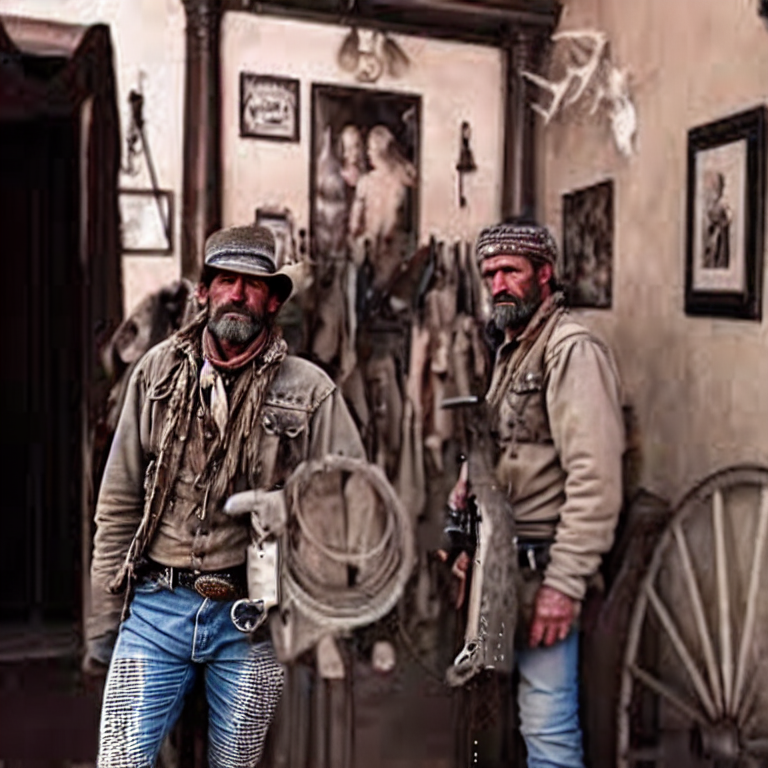

In [159]:
diffusionResult.images[0]